In [15]:
import pandas as pd
from sklearn import linear_model

In [3]:
df = pd.read_csv("houseprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [4]:
# how to handle text data ?
# 1. encoding them into data!
# say 1 = monoroe township, 2 = west windsor, 3 = robinsville
# but the problem is 1 + 2 = 3 ??
# => Monroe Township + West Windsor = Robbinsville ??

# These types of variables are called categorical variable.
# they are of two types
# 1. nominal variables -> made of categories. male/female, red/green/blue
# 2. ordinal variables -> high/medium/low, satisfied/neutral/dissatisfied.

# for nominal varialbe we will use One Hot Encoding.
# the variables that are created extra are called dummy variables. 

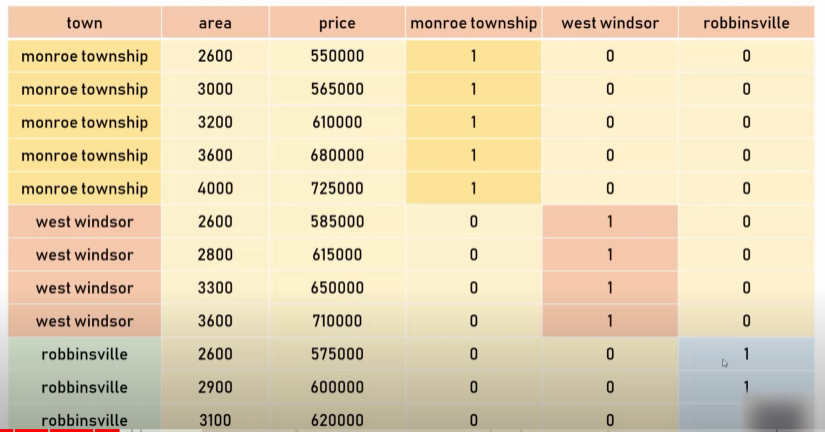

In [6]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [10]:
merged = pd.concat([df, dummies], axis = 1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [11]:
merged = pd.concat([df, dummies], axis = "columns")
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [13]:
# there is a rule that we have to drop one of the dummy variables always. 
# it leads to trap of dummy variables trap. 

df_new = merged.drop(['town', 'west windsor'], axis = 1)
df_new

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [17]:
reg = linear_model.LinearRegression()
reg.fit(df_new[['area', 'monroe township', 'robinsville']], df[['price']])

LinearRegression()

In [20]:
reg.fit(df_new.drop('price', axis = 1), df['price'])

LinearRegression()

In [24]:
reg.predict([[2800,0,1]])

C:\Users\sri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [25]:
reg.predict([[3400,0,0]])

C:\Users\sri\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [28]:
# gives the accuracy for training data set. 
reg.score(df_new[['area', 'monroe township', 'robinsville']], df[['price']])

0.9573929037221873

In [29]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [30]:
# let's use sklearn's one hot encoder.

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [32]:
dfle = df
dfle.town = le.fit_transform(dfle.town)

In [33]:
X = df[['town', 'area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [35]:
y =  df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()